<center><img src="https://www.bhf.org.uk/-/media/images/what-we-do/research/research-successes/artificial_heart_770x510-ss-no-exp.jpg?rev=abcddc5809d64a079d4b5cd83764052c" style="width: 700px;"/>

# Heart Disease Prediction

Cardiovascular disease (CVD), which is the leading cause of death globally, has become a significant problem in public health all over the world. As a result, patients, their families, and the governments of these countries have incurred substantial socioeconomic expenses. Patients at high risk for CVD can be identified by prediction models that use risk stratification. After that, measures that are tailored to this group, such as dietary changes and the use of statins, can help reduce that risk and contribute to the primary prevention of CVD

## Problem Statement:
In this project, we delve into a dataset encapsulating various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease. Given the grave implications of missing a positive diagnosis, our primary emphasis is on ensuring that the model identifies all potential patients, making recall for the positive class a crucial metric.

## Contents:

1. Importing the Libraries
2. Read Dataset
3. Dataset Overview
4. EDA
5. Data Preprocessing
6. Decision Tree Model 
7. Random Forest Model 
8.  KNN Model Building
9. SVM Model Building
10. Conclusion

### 1. Importing the Libraries :
We start off this project by importing all the necessary libraries that will be required for the process.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

# numpy & pandas
import numpy as np
import pandas as pd
import math 

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Other libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline

#machine learning models libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

### 2. Read Dataset :

In [2]:
# load the dataset
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Dataset Description:
    
**Variable**	**Description**
+ age	=            Age of the patient in years
+ sex	 =           Gender of the patient (0 = male, 1 = female)
+ cp	 =           Chest pain type:
                (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain 3: Asymptomatic)
                 
+ trestbps	=     Resting blood pressure in mm Hg
+ chol	=         Serum cholesterol in mg/dl
+ fbs	    =         Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)

+ restecg	 =         Resting electrocardiographic results: (0: Normal, 1: Having ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy)

+ thalach	 =         Maximum heart rate achieved during a stress test
+ exang	=          Exercise-induced angina (1 = yes, 0 = no)
+ oldpeak	 =         ST depression induced by exercise relative to rest
+ slope	=          Slope of the peak exercise ST segment: (0: Upsloping, 1: Flat, 2: Downsloping)
+ ca	   =            Number of major vessels (0-4) colored by fluoroscopy
+ thal	=           Thalium stress test result: (0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described)
+ target	  =         Heart disease status (0 = no disease, 1 = presence of disease)



### 3. Dataset Overview :

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Insight**:
+ The dataset consists of 14 columns 303 rows, Most of the columns 13 out of 14 are of int64 only oldpeak is of float64.

**Note:** Based on the data types and the feature explanations we had earlier, we can see that **9 columns** (`sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `target`) are indeed **numerical** in terms of data type, but **categorical** in terms of their semantics. 
These features should be converted to string (**object**) data type for proper analysis and interpretation:

In [5]:
# Define the continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Identify the features to be converted to object data type
features_to_convert = [feature for feature in df.columns if feature not in continuous_features]

# Convert the identified features to object data type
df[features_to_convert] = df[features_to_convert].astype('object')

df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [6]:
# the summary statistics for our numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


* **`age`**: The average age of the patients is approximately 54.4 years, with the youngest being 29 and the oldest 77 years.
* **`trestbps`**: The average resting blood pressure is about 131.62 mm Hg, ranging from 94 to 200 mm Hg.
* **`chol`**: The average cholesterol level is approximately 246.26 mg/dl, with a minimum of 126 and a maximum of 564 mg/dl.
* **`thalach`**: The average maximum heart rate achieved is around 149.65, with a range from 71 to 202.
* **`oldpeak`**: The average ST depression induced by exercise relative to rest is about 1.04, with values ranging from 0 to 6.2.

In [7]:
# the summary statistics of the categorical features
df.describe(include='object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


**Insight:** Categorical Features (object data type):
* **`sex`**: There are two unique values, with males (denoted as 0) being the most frequent category, occurring 207 times out of 303 entries.
* **`cp`**: Four unique types of chest pain are present. The most common type is "**0**", occurring 143 times.
* **`fbs`**: There are two categories, and the most frequent one is "**0**" (indicating fasting blood sugar less than 120 mg/dl), which appears 258 times.
* **`restecg`**: Three unique results are present. The most common result is "**1**", appearing 152 times.
* **`exang`**: There are two unique values. The most frequent value is "**0**" (indicating no exercise-induced angina), which is observed 204 times.
* **`slope`**: Three unique slopes are present. The most frequent slope type is "**2**", which occurs 142 times.
* **`ca`**: There are five unique values for the number of major vessels colred by fluoroscopy, with "**0**" being the most frequent, occurring 175 times.
* **`thal`**: Four unique results are available. The most common type is "**2**" (indicating a reversible defect), observed 166 times.
* **`target`**: Two unique values indicate the presence or absence of heart disease. The value "**1**" (indicating the presence of heart disease) is the most frequent, observed in 165 entries.

### 4. EDA(Exploratory Data Analysis):

#### Univariate Analysis
we'll focus on one feature at a time to understand its distribution and range.

##### Numerical Variables Univariate Analysis

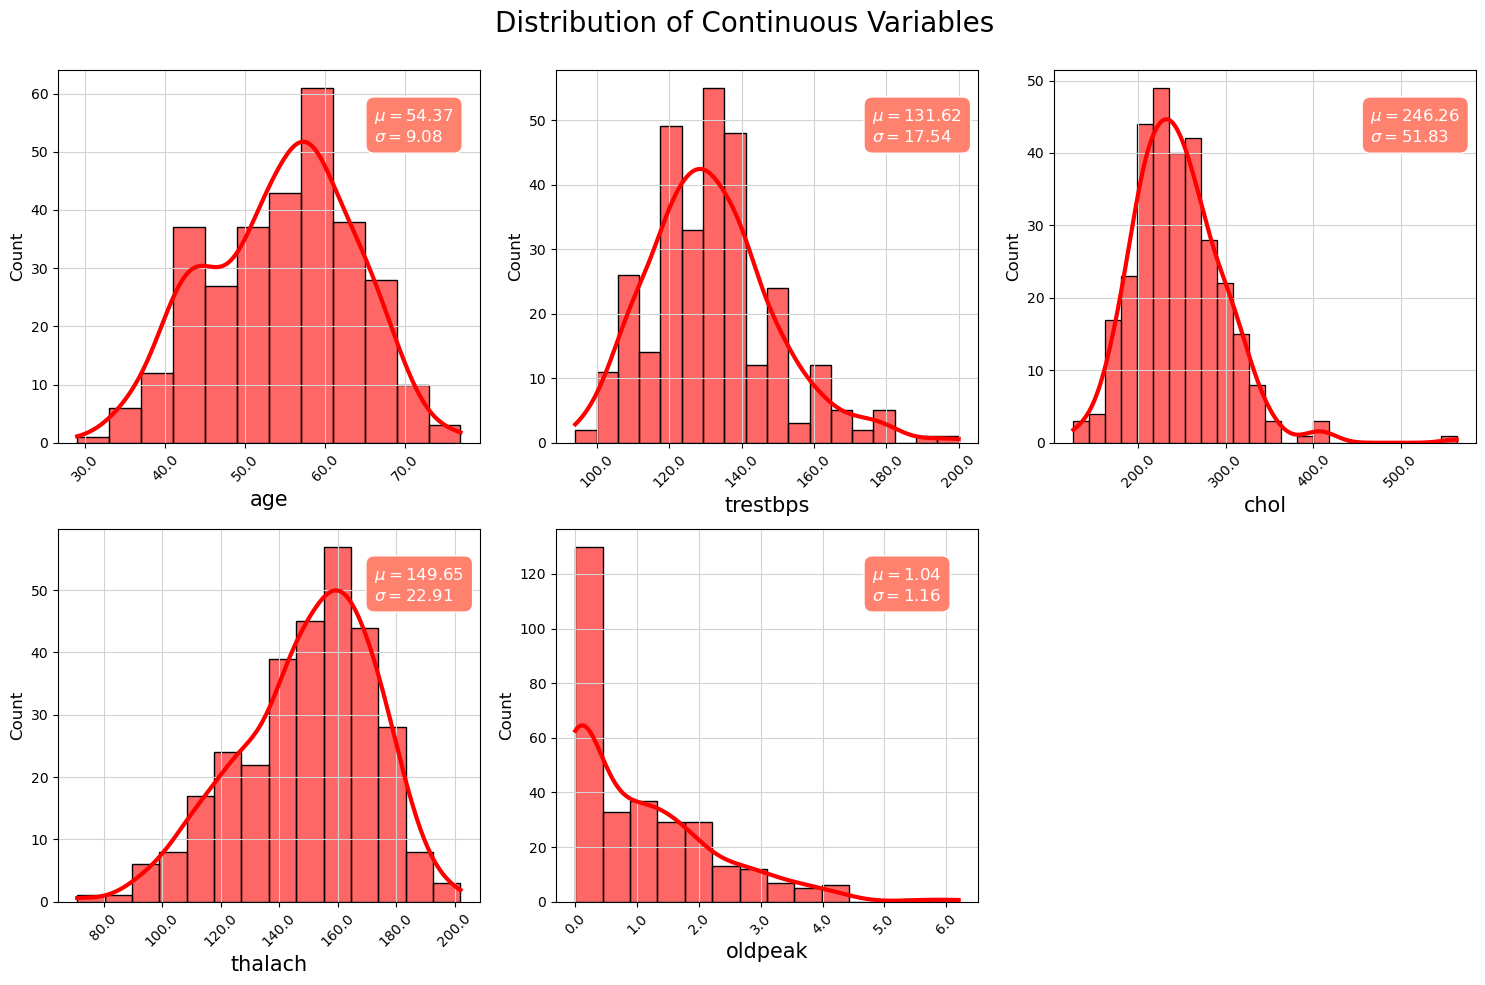

In [8]:
# Filter out continuous features for the univariate analysis
df_continuous = df[continuous_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x, y = divmod(i, 3)  # Equivalent to x = i // 3, y = i % 3
    
    # Plot histogram with KDE curve
    sns.histplot(data=df_continuous, x=col, kde=True, ax=ax[x, y], color='red', alpha=0.6, line_kws={'lw': 3})
    
    # Customizing axes
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')
    
    # Add mean and standard deviation as text
    textstr = f"$\mu={df_continuous[col].mean():.2f}$\n$\sigma={df_continuous[col].std():.2f}$"
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Hide last subplot
ax[1, 2].axis('off')

# Add title and adjust layout
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Display the plot
plt.show()


**Insight:**

**Age (age):** The distribution peaks around the late 50s, with a mean age of approximately 54.37 years and a standard deviation of 9.08 years.

**Resting Blood Pressure (trestbps):** Most individuals have blood pressure levels between 120 and 140 mm Hg, with a mean of approximately 131.62 mm Hg and a standard deviation of 17.54 mm Hg.

**Serum Cholesterol (chol):** The majority of individuals have cholesterol levels between 200 and 300 mg/dl, with a mean of approximately 246.26 mg/dl and a standard deviation of 51.83 mg/dl.

**Maximum Heart Rate Achieved (thalach):** Most individuals achieve a heart rate between 140 and 170 bpm during stress tests, with a mean of approximately 149.65 bpm and a standard deviation of 22.91 bpm.

**ST Depression Induced by Exercise (oldpeak):** The distribution indicates that many individuals did not experience significant ST depression during exercise, with a mean value of 1.04 and a standard deviation of 1.16.

##### Categorical Variables Univariate Analysis

In [9]:
# Filter out categorical features for the univariate analysis
categorical_features = df.columns.difference(continuous_features)
df_categorical = df[categorical_features]

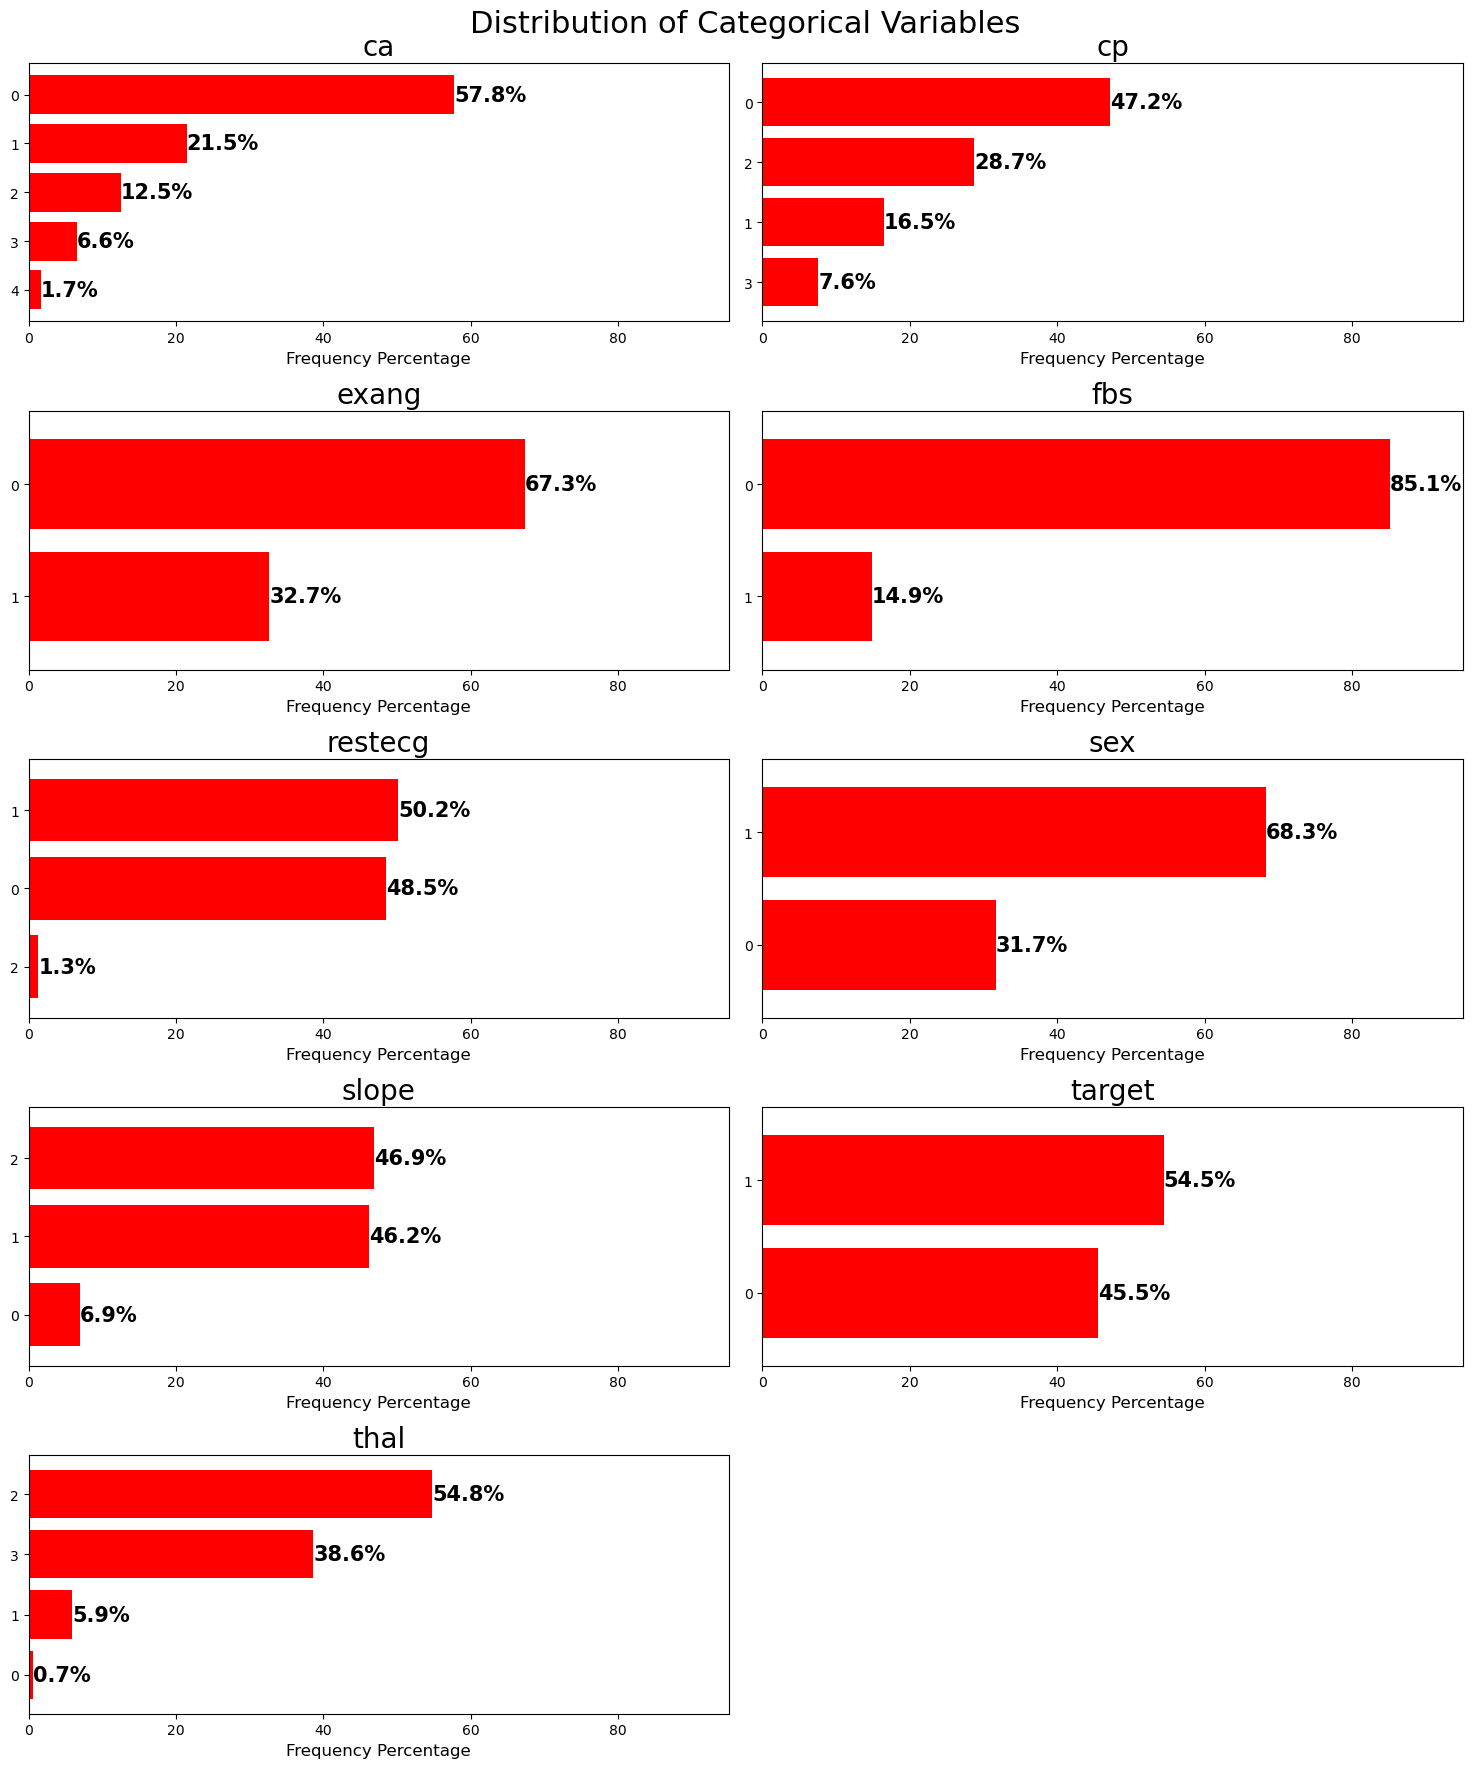

In [10]:
# Set up the subplot for a 4x2 layout
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 18))

# Loop to plot bar charts for each categorical feature in the 4x2 layout
for i, col in enumerate(categorical_features):
    row = i // 2
    col_idx = i % 2
    
    # Calculate frequency percentages
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

ax[4,1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

**Insight:**

+ **Gender(sex):** The dataset is predominantly female, constituting a significant majority.

    
+ **Type of Chest Pain(cp):** The dataset shows varied chest pain types among patients. Type 0 (Typical angina) seems to be the most prevalent, but an exact distribution among the types can be inferred from the bar plots.

    
+ **Fasting Blood Sugar(fbs):** A significant majority of the patients have their fasting blood sugar level below 120 mg/dl, indicating that high blood sugar is not a common condition in this dataset.

    
+ **Resting Electrocardiographic Results(restecg):** The results show varied resting electrocardiographic outcomes, with certain types being more common than others. The exact distribution can be gauged from the plots.

    
+ **Exercise-Induced Angina(exang):** A majority of the patients do not experience exercise-induced angina, suggesting that it might not be a common symptom among the patients in this dataset.

    
+ **Slope of the Peak Exercise ST Segment(slope):** The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots.

+ **Number of Major Vessels Colored by Fluoroscopy(ca):** Most patients have fewer major vessels colored by fluoroscopy, with '0' being the most frequent.

    
+ **Thalium Stress Test Result(thal):** The dataset displays a variety of thalium stress test results. One particular type seems to be more prevalent, but the exact distribution can be seen in the plots.

    
+ **Presence of Heart Disease(target):** The dataset is nearly balanced in terms of heart disease presence, with about 54.5% having it and 45.5% not having it.

#### Bivariate Analysis
we'll explore the relationship between each feature and the target variable. This helps us figure out the importance and influence of each feature on the target outcome.

##### Numerical Features vs Target
We are going to visualize each continuous feature against the target using two types of charts:

+ Bar plots - showing the mean values.
+ KDE plots - displaying the distribution for each target category.

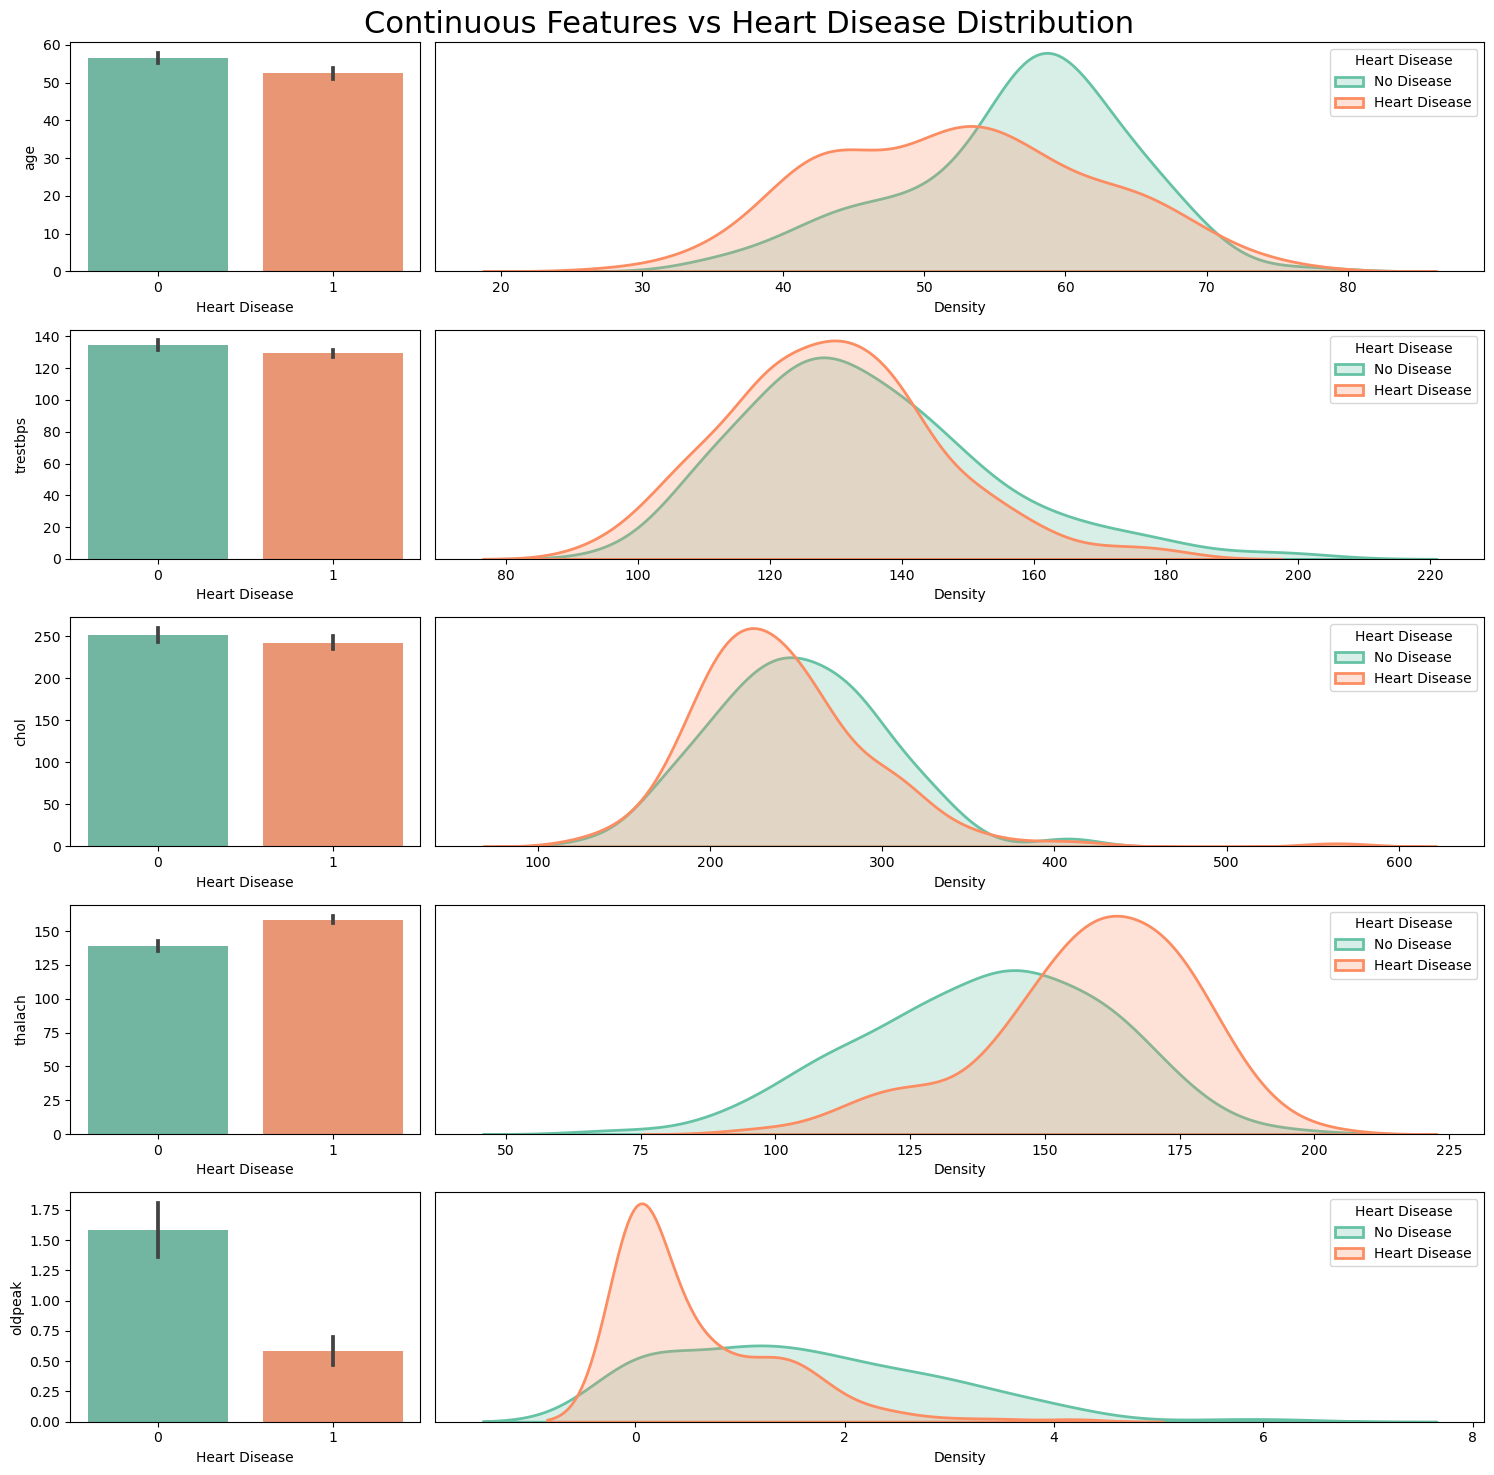

In [11]:
# Set color palette
sns.set_palette(['#66c2a5', '#fc8d62'])

# Create the subplots
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 3]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(continuous_features):
    # Barplot showing the mean value of the feature for each target category
    sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    ax[i,0].set_xlabel("Heart Disease")
    ax[i,0].set_ylabel(col)
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]==0][col], fill=True, linewidth=2, ax=ax[i,1], label='No Disease', color='#66c2a5')
    sns.kdeplot(data=df[df["target"]==1][col], fill=True, linewidth=2, ax=ax[i,1], label='Heart Disease', color='#fc8d62')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    ax[i,1].set_xlabel("Density")
    ax[i,1].set_ylabel("")
    
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Heart Disease Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()


**Insight:**

+ **Age(age):** The distributions show a slight shift with patients having heart disease being a bit younger on average than those without. The mean age for patients without heart disease is higher.

    
+ **Resting Blood Pressure(trestbps):** Both categories display overlapping distributions in the KDE plot, with nearly identical mean values, indicating limited differentiating power for this feature.

    
+ **Serum Cholesterol(chol):** The distributions of cholesterol levels for both categories are quite close, but the mean cholesterol level for patients with heart disease is slightly lower.
 
    
+ **Maximum Heart Rate Achieved(thalach):** There's a noticeable difference in distributions. Patients with heart disease tend to achieve a higher maximum heart rate during stress tests compared to those without.

    
+ **ST Depression(oldpeak):** The ST depression induced by exercise relative to rest is notably lower for patients with heart disease. Their distribution peaks near zero, whereas the non-disease category has a wider spread.
    

##### Categorical Features vs Target
We are going to display 100% stacked bar plots for each categorical feature illustrating the proportion of each category across the two target classes, complemented by the exact counts and percentages on the bars.

In [12]:
# Remove 'target' from the categorical_features
categorical_features = [feature for feature in categorical_features if feature != 'target']

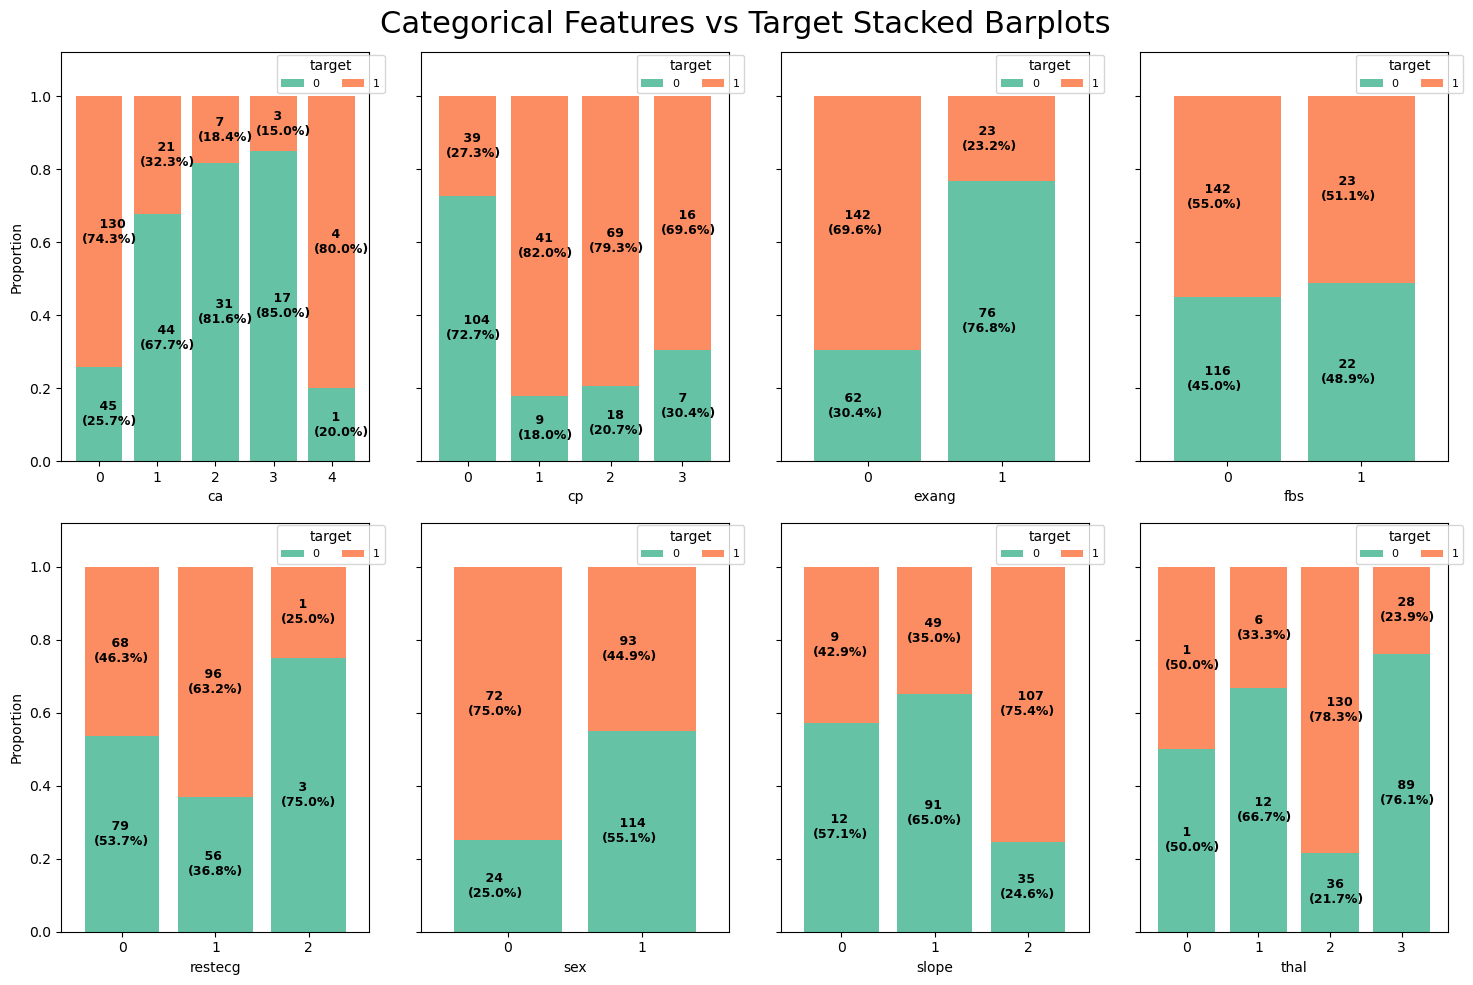

In [13]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,10))

for i, col in enumerate(categorical_features):
    
    # Create a cross tabulation showing the proportion of target categories for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Calculate the proportion of target categories for each category of the feature
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    colors = ['#66c2a5', '#fc8d62']
    cmp = ListedColormap(colors)
    
    # Plot stacked bar charts
    x, y = i // 4, i % 4
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to the plot
    for idx, val in enumerate(cross_tab.index.values):
        for proportion, count, y_location in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx - 0.3, y=(y_location - proportion) + (proportion / 2) - 0.03,
                          s=f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                          color="black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='target', loc=(0.7, 0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0, 1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)
    
# Set the main title
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()


**Insight:**


+ **Number of Major Vessels (ca):** Patients with fewer major vessels colored by fluoroscopy tend to have a higher proportion of heart disease. As the number of colored vessels increases, the likelihood of heart disease decreases.

+ **Chest Pain Type (cp):** Different types of chest pain show varied proportions of heart disease. Types 1, 2, and 3 have a higher likelihood of heart disease compared to type 0.

+ **Exercise Induced Angina (exang):** Patients without exercise-induced angina (0) have a higher proportion of heart disease compared to those with exercise-induced angina (1).

+ **Fasting Blood Sugar (fbs):** There is no significant difference in heart disease presence between individuals with fasting blood sugar > 120 mg/dl (1) and those with fasting blood sugar <= 120 mg/dl (0).

+ **Resting Electrocardiographic Results (restecg):** Type 1 shows a higher proportion of heart disease presence compared to other types, indicating its potential impact on heart disease prediction.

+ **Sex (sex):** Males have a higher proportion of heart disease compared to females, suggesting gender as an influential factor in predicting heart disease.

+ **Slope of the Peak Exercise ST Segment (slope):** Patients with slope type 2 exhibit a notably higher proportion of heart disease presence, indicating its significance as a predictor.

+ **Thalium Stress Test Result (thal):** The reversible defect category (2) has a higher proportion of heart disease presence compared to other categories, highlighting its importance in prediction.

In summary:

+ **Higher Impact on Target:** ca, cp, exang, sex, slope, and thal.
+ **Moderate Impact on Target:** restecg.
+ **Lower Impact on Target:** fbs.





### 5. Data Preprocessing :

##### Missing Value Treatment

In [14]:
# Check for missing values in the dataset
df.isnull().sum().sum()

0

##### Outlier Treatment

In [15]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [16]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

#### Identifying outliers for the specified continuous features, we found the following:

+ trestbps: 9 outliers
+ chol: 5 outliers
+ thalach: 1 outlier
+ oldpeak: 5 outliers
+ age: No outliers

#### Sensitivity to Outliers:

+ SVM (Support Vector Machine): SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.

+ Decision Trees (DT) and Random Forests (RF): These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.

+ K-Nearest Neighbors (KNN): KNN is sensitive to outliers because it relies on distances between data points to make predictions. Outliers can distort these distances.

+ AdaBoost: This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

#### Approaches for Outlier Treatment:

+ Removal of Outliers: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

+ Capping Outliers: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.

+ Transformations: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.

+ Robust Scaling: Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

#### Conclusion:

Given the nature of the algorithms (especially SVM and KNN) and the small size of our dataset, direct removal of outliers might not be the best approach. Instead, we'll focus on applying transformations like Box-Cox in the subsequent steps to reduce the impact of outliers and make the data more suitable for modeling.

#### Categorical Features Encoding
###### One-hot Encoding Decision:
Based on the feature descriptions, let's decide on one-hot encoding:

+ Nominal Variables: These are variables with no inherent order. They should be one-hot encoded because using them as numbers might introduce an unintended order to the model.

+ Ordinal Variables: These variables have an inherent order. They don't necessarily need to be one-hot encoded since their order can provide meaningful information to the model.

**Given the above explanation:**

+ sex: This is a binary variable with two categories (male and female), so it doesn't need one-hot encoding.

+ cp: Chest pain type can be considered as nominal because there's no clear ordinal relationship among the different types of chest pain (like Typical angina, Atypical angina, etc.). It should be one-hot encoded.

+ fbs: This is a binary variable (true or false), so it doesn't need one-hot encoding.

+ restecg: This variable represents the resting electrocardiographic results. The results, such as "Normal", "Having ST-T wave abnormality", and "Showing probable or definite left ventricular hypertrophy", don't seem to have an ordinal relationship. Therefore, it should be one-hot encoded.

+ exang: This is a binary variable (yes or no), so it doesn't need one-hot encoding.

+ slope: This represents the slope of the peak exercise ST segment. Given the descriptions (Upsloping, Flat, Downsloping), it seems to have an ordinal nature, suggesting a particular order. Therefore, it doesn't need to be one-hot encoded.

+ ca: This represents the number of major vessels colored by fluoroscopy. As it indicates a count, it has an inherent ordinal relationship. Therefore, it doesn't need to be one-hot encoded.

+ thal: This variable represents the result of a thalium stress test. The different states, like "Normal", "Fixed defect", and "Reversible defect", suggest a nominal nature. Thus, it should be one-hot encoded.

#### Summary:
Need One-Hot Encoding: cp, restecg, thal
Don't Need One-Hot Encoding: sex, fbs, exang, slope, ca

In [17]:
# Implementing one-hot encoding on the specified categorical features
df_encoded = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], drop_first=True)

# Convert the rest of the categorical variables that don't need one-hot encoding to integer data type
features_to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']
for feature in features_to_convert:
    df_encoded[feature] = df_encoded[feature].astype(int)

df_encoded.dtypes

age            int64
sex            int32
trestbps       int64
chol           int64
fbs            int32
thalach        int64
exang          int32
oldpeak      float64
slope          int32
ca             int32
target         int32
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
dtype: object

In [18]:
# Displaying the resulting DataFrame after one-hot encoding
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0


In [19]:
# Define the features (X) and the output labels (y)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target'] 

In [20]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [21]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**Box-Cox** transformation is a powerful method to stabilize variance and make the data more normal-distribution-like. It's particularly useful when you're unsure about the exact nature of the distribution you're dealing with, as it can adapt itself to the best power transformation. However, the Box-Cox transformation only works for positive data, so one must be cautious when applying it to features that contain zeros or negative values.

The Box-Cox transformation requires all data to be strictly positive. To transform the oldpeak feature using Box-Cox, we can add a small constant (e.g., 0.001) to ensure all values are positive:

In [22]:
# Adding a small constant to 'oldpeak' to make all values positive
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

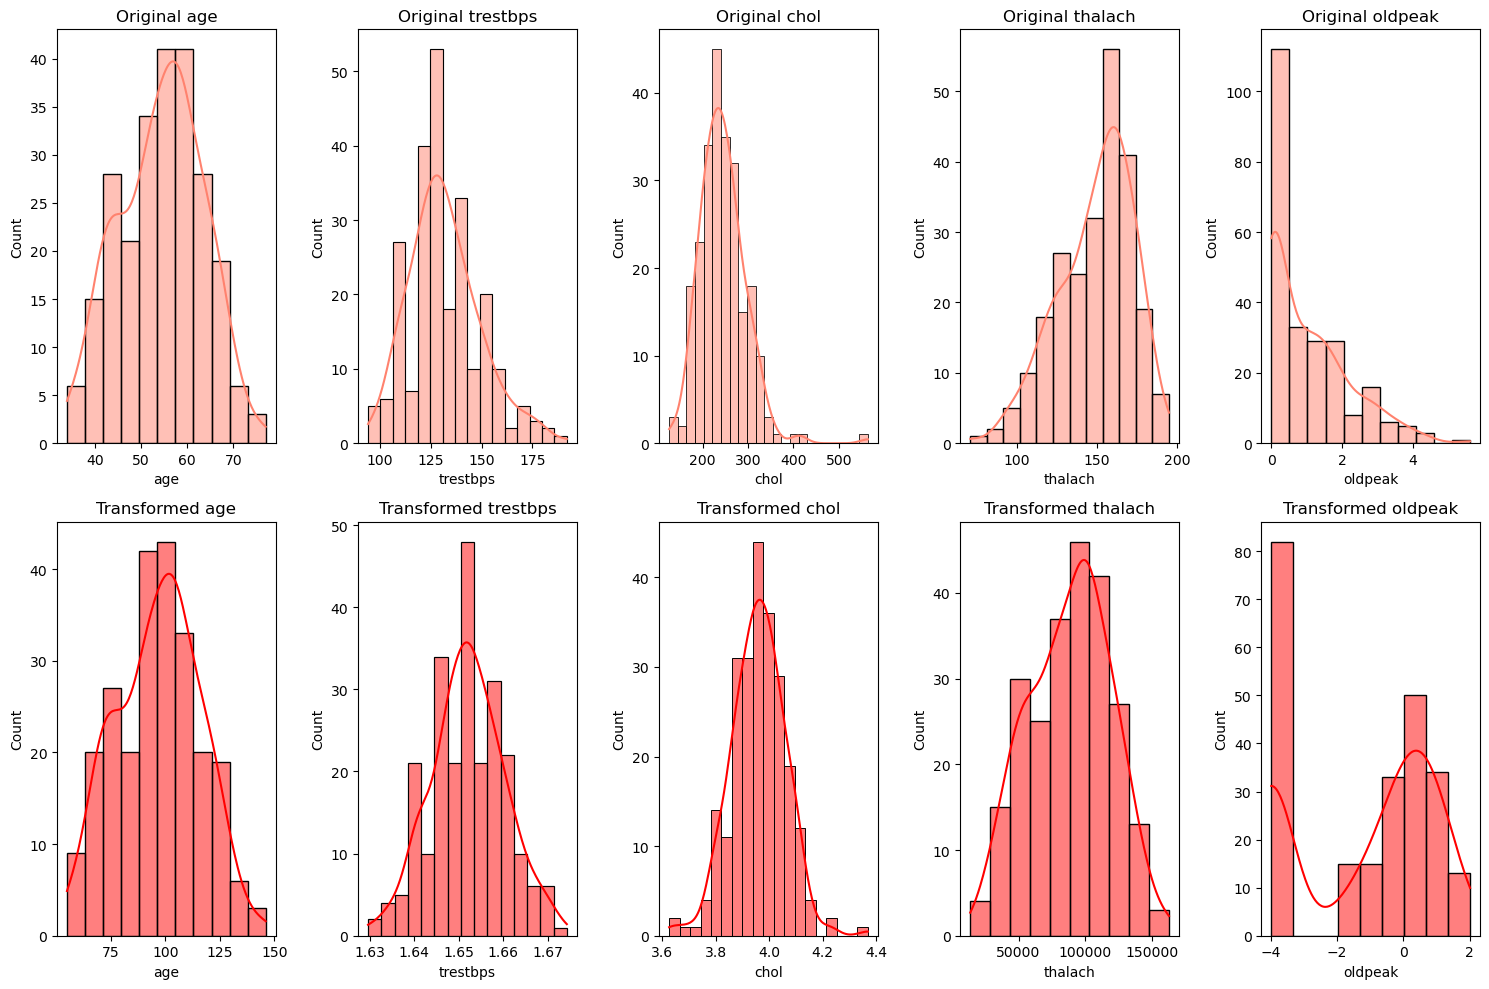

In [23]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

**Insight:**

**1. age:** The transformation has made the age distribution more symmetric, bringing it closer to a normal distribution.

**2. Trestbps:** The distribution of trestbps post-transformation appears to be more normal-like, with reduced skewness.

**3. Chol:** After applying the Box-Cox transformation, chol exhibits a shape that's more aligned with a normal distribution.

**4. Thalach:** The thalach feature was already fairly symmetric before the transformation, and post-transformation, it continues to show a similar shape, indicating its original distribution was close to normal.

**5. Oldpeak:** The transformation improved the oldpeak distribution, but it still doesn't perfectly resemble a normal distribution. This could be due to the inherent nature of the data or the presence of outliers. To enhance its normality, we could consider utilizing advanced transformations such as the Yeo-Johnson transformation, which can handle zero and negative values directly.

In [24]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
269,99.775303,1,1.652121,4.044510,1,34193.175862,1,0.490856,0,0,0,0,0,0,0,0,0,1
191,104.060224,1,1.651136,3.909224,0,61564.541974,1,0.846853,1,3,0,0,0,0,0,0,0,1
15,87.096543,0,1.646937,3.916242,0,97354.732537,0,0.490856,1,0,0,1,0,1,0,0,1,0
224,95.519131,1,1.641028,3.960430,0,55975.802227,1,1.130195,1,1,0,0,0,1,0,0,0,1
250,89.190680,1,1.656716,4.069854,0,51729.405015,1,1.634849,1,3,0,0,0,1,0,0,0,1


### 6. Decision Tree Model :

In [25]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

####  Hyperparameter Tuning

In [26]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [27]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

In [28]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [29]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### DT Model Evaluation

**Now let's evaluate our DT model performance on both the training and test datasets:**

In [30]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       110
           1       0.78      0.77      0.78       132

    accuracy                           0.76       242
   macro avg       0.76      0.76      0.76       242
weighted avg       0.76      0.76      0.76       242



In [31]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.78      0.85      0.81        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.79        61



**Given that the metric values for both the training and test datasets are closely aligned and not significantly different, the model doesn't appear to be overfitting.**

**Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:**

In [32]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [33]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.8,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79


### 7. Random Forest Model:

In [34]:
rf = RandomForestClassifier(random_state=0)

In [35]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

##### RF Hyperparameter Tuning

In [36]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


##### RF Model Evaluation

**Finally, I am evaluating the model's performance on both the training and test datasets:**

In [37]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       110
           1       0.83      0.87      0.85       132

    accuracy                           0.83       242
   macro avg       0.83      0.83      0.83       242
weighted avg       0.83      0.83      0.83       242



In [38]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



**The RF model's similar performance on both training and test data suggests it isn't overfitting.**

In [39]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84


### 8. KNN Model:



**First of all, let's define the base KNN model and set up the pipeline with scaling:**

In [40]:
# Define the base KNN model and set up the pipeline with scaling
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

##### KNN Hyperparameter Tuning

In [41]:
# Hyperparameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': list(range(1, 12)),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}

In [42]:
# Hyperparameter tuning for KNN
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, X_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

KNN Optimal Hyperparameters: 
 {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}


##### KNN Model Evaluation

**Let's evaluate the model's performance on both the training and test datasets:**

In [43]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_knn.predict(X_train)))


              precision    recall  f1-score   support

           0       0.80      0.79      0.79       110
           1       0.83      0.83      0.83       132

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [44]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



**The KNN model's consistent scores across training and test sets indicate no overfitting.**

In [45]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


### 9. SVM Model:

**First, let's define the base SVM model and set up the pipeline with scaling:**

In [46]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True)) 
])

##### SVM Hyperparameter Tuning

In [47]:
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}

In [48]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


##### SVM Model Evaluation:

**Let's evaluate our SVM model's performance on both the training and test datasets:**

In [49]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.54      0.68       110
           1       0.71      0.96      0.82       132

    accuracy                           0.77       242
   macro avg       0.82      0.75      0.75       242
weighted avg       0.81      0.77      0.76       242



In [50]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71        28
           1       0.73      0.97      0.83        33

    accuracy                           0.79        61
   macro avg       0.83      0.77      0.77        61
weighted avg       0.83      0.79      0.78        61



**Insight:**
The recall of 0.97 for class 1 indicates that almost all the true positive cases (i.e., patients with heart disease) are correctly identified. This high recall is of utmost importance in a medical context, where missing a patient with potential heart disease could have dire consequences.

However, it's also worth noting the balanced performance of the model. With an F1-score of 0.83 for class 1, it's evident that the model doesn't merely focus on maximizing recall at the expense of precision. This means the reduction in False Negatives hasn't significantly increased the False Positives, ensuring that the cost and effort of examining healthy individuals are not unnecessarily high.

Overall, the model's performance is promising for medical diagnostics, especially when prioritizing the accurate identification of patients with heart disease without overburdening the system with false alarms.

In [51]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79


### 10. Conclusion:

In [52]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation]
results = pd.concat(all_evaluations)

# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.94,0.73,0.57,0.97,0.71,0.83,0.83,0.77,0.77,0.79
RF,0.85,0.83,0.79,0.88,0.81,0.85,0.84,0.83,0.83,0.84
DT,0.80,0.78,0.71,0.85,0.75,0.81,0.79,0.78,0.78,0.79
KNN,0.82,0.85,0.82,0.85,0.82,0.85,0.83,0.83,0.83,0.84


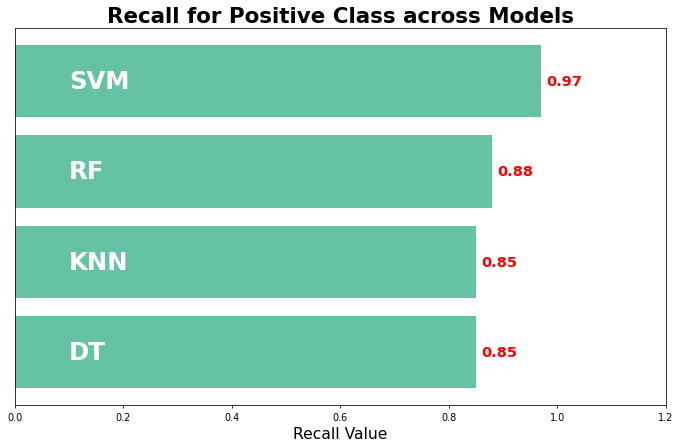

In [53]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='#66c2a5')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

###  The SVM model demonstrates a commendable capability in recognizing potential heart patients. With a recall of 0.97 for class 1, it's evident that almost all patients with heart disease are correctly identified. This is of paramount importance in a medical setting. However, the model's balanced performance ensures that while aiming for high recall, it doesn't compromise on precision, thereby not overburdening the system with unnecessary alerts.